# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
movies = pd.read_csv('movies.csv', parse_dates= ['released'])
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Checking Missing Data

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   float64       
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   float64       
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
 14  year      6820 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 799.3+ KB


In [4]:
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
_int_col = ['budget', 'gross']
for i in _int_col:
    movies[i] = movies[i].astype('int')
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Create Correct relseased year, since there exists a discrepancy between column 'year' and column 'relseased'

In [6]:
movies['year'] = movies['released'].dt.year
movies.head(3)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986


In [7]:
pd.set_option('Display.max_rows', 40)
movies.sort_values('gross', ascending= False).head(20)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999
6398,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015


# Show the the list of film company and the Top-5 companies

In [8]:
pd.Series(movies['company'].unique())

0                Columbia Pictures Corporation
1                           Paramount Pictures
2       Twentieth Century Fox Film Corporation
3                         Walt Disney Pictures
4                                      Hemdale
                         ...                  
2174                            Digic Pictures
2175               Bing Feng Bao Entertainment
2176                   Anna Biller Productions
2177                  Siempre Viva Productions
2178                       Borderline Presents
Length: 2179, dtype: object

In [9]:
movies['company'].value_counts().nlargest(5)

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Name: company, dtype: int64

# Explore the Relationship between 'Gross' and other attributes.

In [10]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Text(0, 0.5, 'Buget for Film')

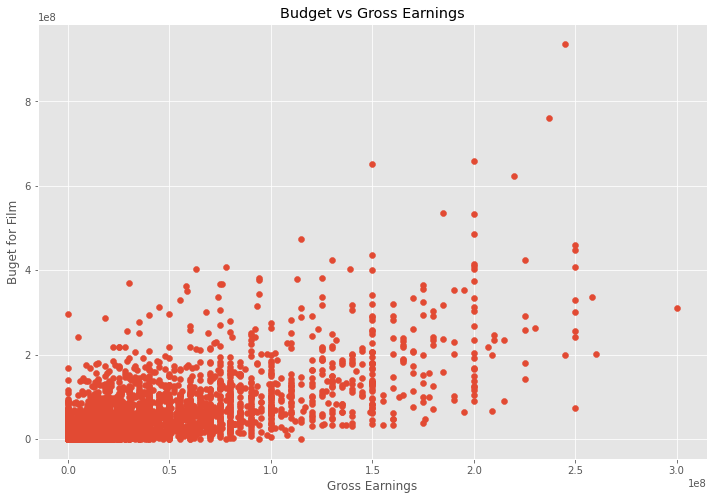

In [11]:
plt.scatter(x = movies['budget'], y= movies['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Buget for Film')

# Plot Budget vs Gross using Seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

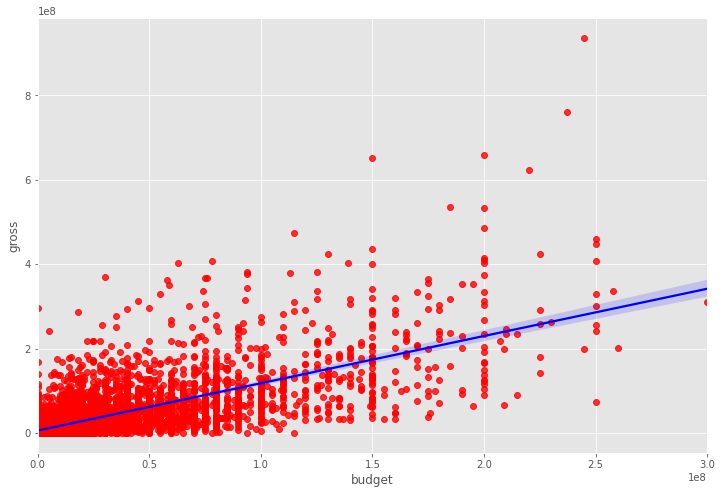

In [12]:
sns.regplot(data = movies, x = 'budget', y = 'gross', scatter_kws= {'color':'red'}, line_kws={"color": 'blue'})

# Correlation

Text(114.0, 0.5, 'Movie Featues')

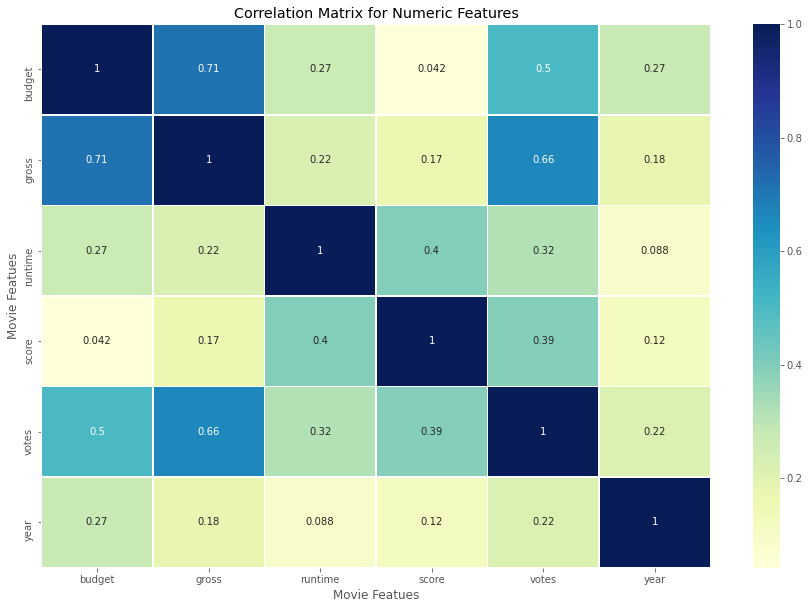

In [13]:
figure = plt.figure(figsize= (15,10))
sns.heatmap(movies.corr(),annot=True, linewidths=.5, cmap= 'YlGnBu')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Featues')
plt.ylabel('Movie Featues')

In [14]:
df_numerized = movies
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,1986-08-22,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,1986-06-11,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1986-05-16,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,1986-07-18,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,1986-08-01,90,6.9,1139,36636,2549,1986


Text(114.0, 0.5, 'Movie Featues')

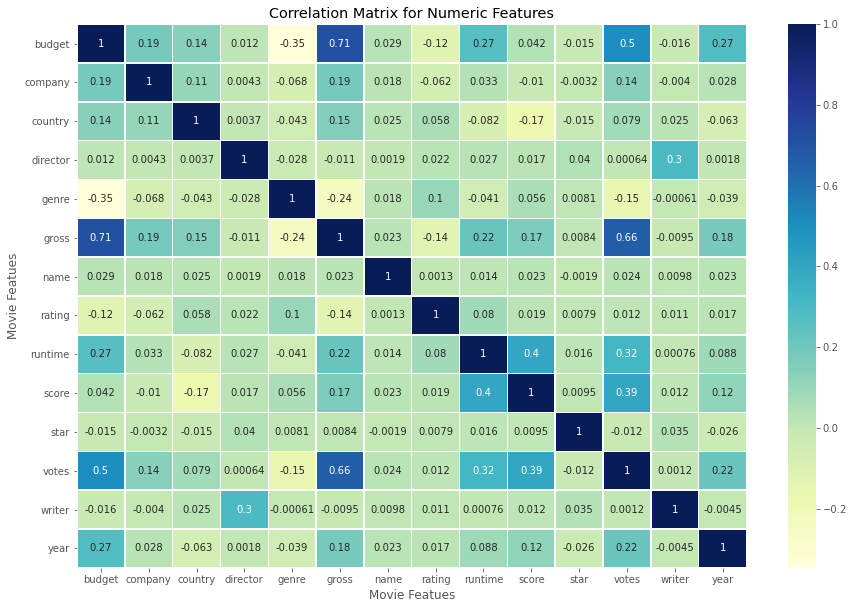

In [15]:
figure = plt.figure(figsize= (15,10))
sns.heatmap(df_numerized.corr('pearson'),annot=True, linewidths=.5, cmap= 'YlGnBu')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Featues')
plt.ylabel('Movie Featues')

In [16]:
df_numerized.corr().unstack().sort_values()[df_numerized.corr().unstack().sort_values() > 0.5]

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
          budget      0.712196
budget    gross       0.712196
          budget      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
rating    rating      1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

# Conclusion
 - Votes and Budget have the highest correlation to gross earnings.